<a href="https://colab.research.google.com/github/Pallab-Paul/Fraud-Detection/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [0]:
train_transaction = pd.read_csv('train_transaction.csv')
test_transaction = pd.read_csv('test_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_identity = pd.read_csv('test_identity.csv')
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')


In [54]:
train.shape

(324728, 434)

In [55]:
test.shape

(380321, 433)

In [0]:
del train_transaction
del train_identity
del test_transaction
del test_identity

In [57]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

In [58]:
fraud = train.loc[train['isFraud']==1]
non_fraud = train.loc[train['isFraud']==0]
print(len(fraud))
print(len(non_fraud))

11001
313727


<function matplotlib.pyplot.show>

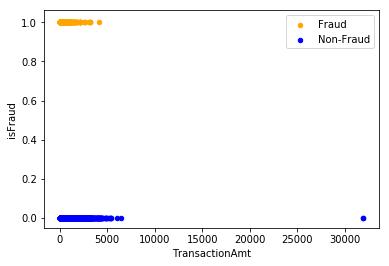

In [59]:
ax = fraud.plot.scatter(x='TransactionAmt',y='isFraud',color='orange',label='Fraud')
non_fraud.plot.scatter(x='TransactionAmt',y='isFraud',color='blue',label='Non-Fraud',ax=ax)
plt.show

In [60]:
null_percent = train.isnull().sum()/train.shape[0]

cols_to_drop = np.array(null_percent[null_percent > 0.7].index)

cols_to_drop

array(['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13',
       'D14', 'M7', 'M8', 'M9', 'V138', 'V139', 'V140', 'V141', 'V142',
       'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150',
       'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158',
       'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166',
       'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',
       'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182',
       'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190',
       'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198',
       'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206',
       'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214',
       'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222',
       'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230',
       'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238',
     

In [0]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop,axis=1)

In [0]:
col = train.head(3)
colm = list(train)
colm.remove('isFraud')
for i in colm:
  train[i] = train[i].replace(np.nan, train[i].mode()[0])
  test[i] = test[i].replace(np.nan, train[i].mode()[0])


In [63]:

x = train.iloc[:,train.columns!='isFraud']
y= train['isFraud']

cat_data = x.select_dtypes(include='object')
num_data = x.select_dtypes(exclude='object')

cat_cols = cat_data.columns.values
num_cols = num_data.columns.values

print('Categorical Columns : ',cat_cols)
print('Numerical Columns : ',num_cols)

Categorical Columns :  ['ProductCD' 'card4' 'card6' 'P_emaildomain' 'M1' 'M2' 'M3' 'M4' 'M5' 'M6']
Numerical Columns :  ['TransactionID' 'TransactionDT' 'TransactionAmt' 'card1' 'card2' 'card3'
 'card5' 'addr1' 'addr2' 'dist1' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8'
 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D5' 'D10' 'D11'
 'D15' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'V29' 'V30' 'V31' 'V32' 'V33' 'V34' 'V35' 'V36'
 'V37' 'V38' 'V39' 'V40' 'V41' 'V42' 'V43' 'V44' 'V45' 'V46' 'V47' 'V48'
 'V49' 'V50' 'V51' 'V52' 'V53' 'V54' 'V55' 'V56' 'V57' 'V58' 'V59' 'V60'
 'V61' 'V62' 'V63' 'V64' 'V65' 'V66' 'V67' 'V68' 'V69' 'V70' 'V71' 'V72'
 'V73' 'V74' 'V75' 'V76' 'V77' 'V78' 'V79' 'V80' 'V81' 'V82' 'V83' 'V84'
 'V85' 'V86' 'V87' 'V88' 'V89' 'V90' 'V91' 'V92' 'V93' 'V94' 'V95' 'V96'
 'V97' 'V98' 'V99' 'V100' 'V101' 'V102' 'V103' 'V104' 'V105' 'V106' 'V107'
 'V1

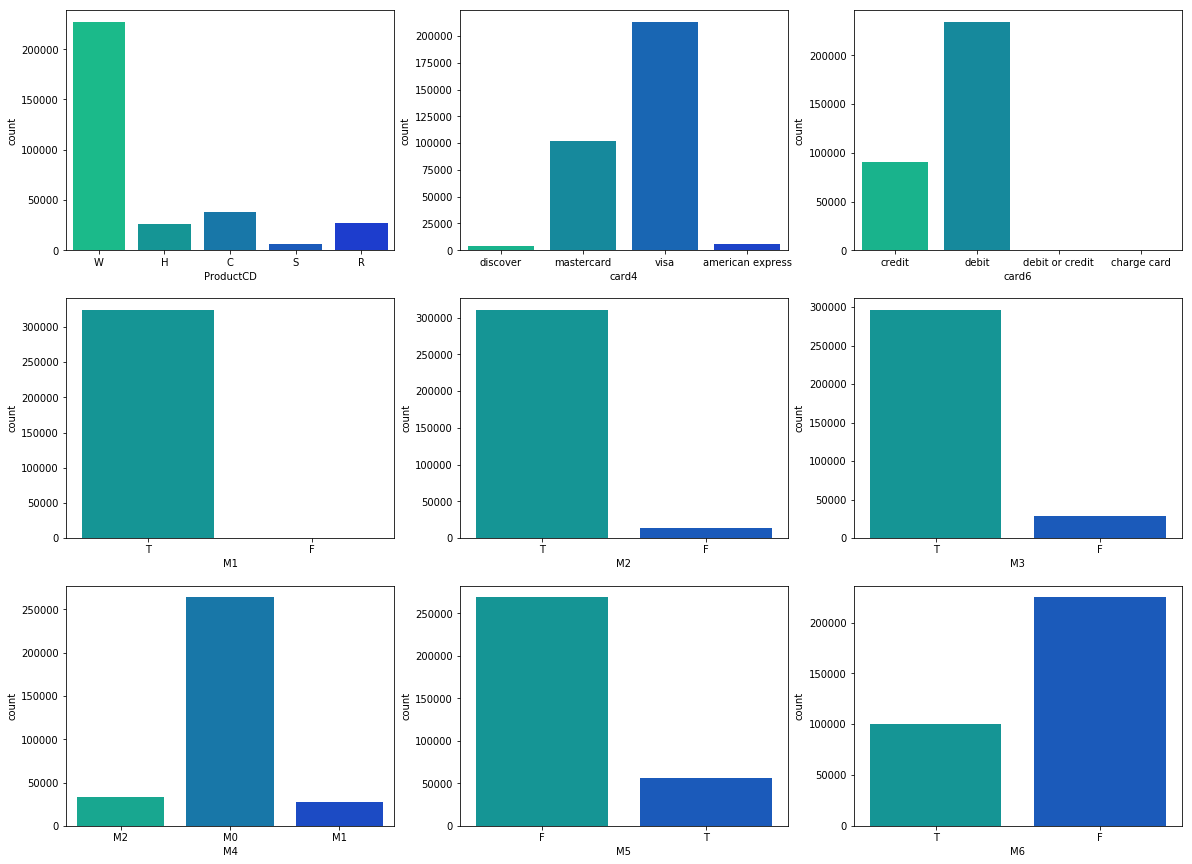

In [64]:
fig = plt.figure(figsize=(20,15))

j = 1
for i in cat_cols:
    if(i == 'P_emaildomain' or i== 'R_emaildomain'):
        continue
    plt.subplot(3,3,j)
    sns.countplot(x=x[i], palette='winter_r')
    j = j + 1
    
plt.show()

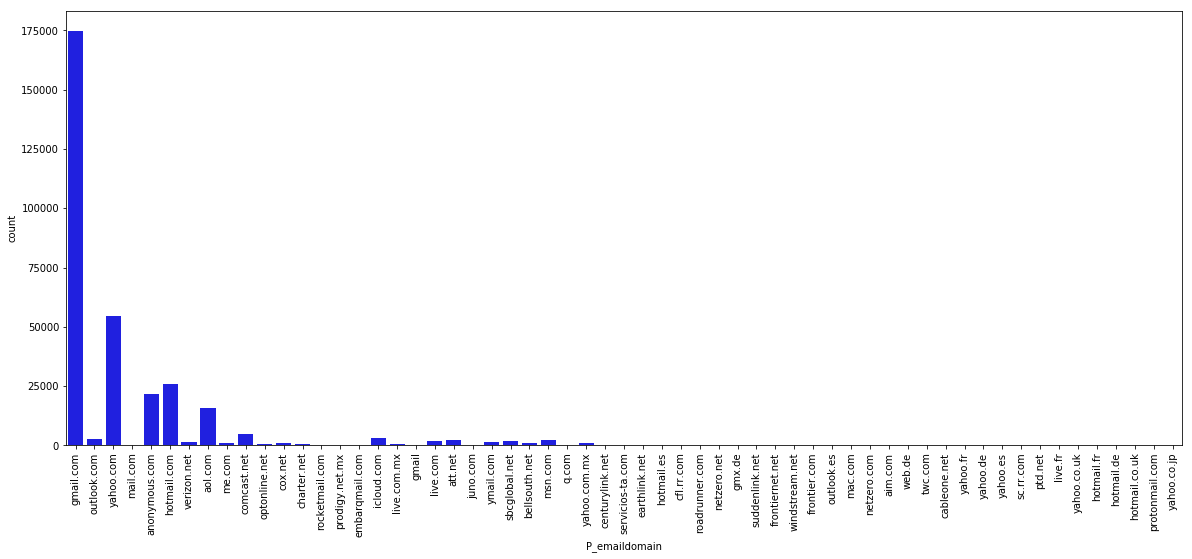

In [65]:
plt.figure(figsize=(20,8))
sns.countplot(x=x['P_emaildomain'], color='blue')
plt.xticks(rotation = 90)
plt.show()

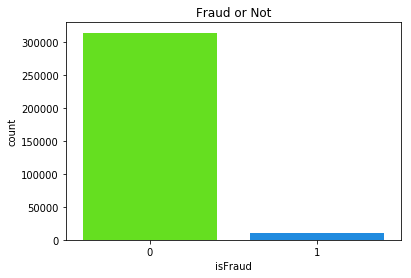

In [67]:
sns.countplot(x=y, palette='gist_rainbow')
plt.title('Fraud or Not')
plt.show()

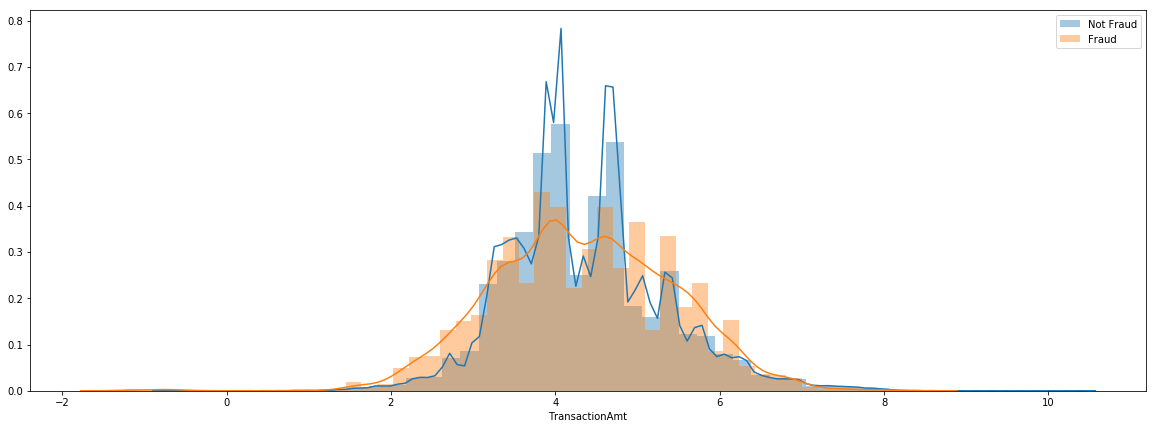

In [68]:
df1 = train[train['isFraud'] == 0]
not_fraud = df1['TransactionAmt'].apply(np.log)

df2 = train[train['isFraud'] == 1]
fraud = df2['TransactionAmt'].apply(np.log) 

plt.figure(figsize=(20, 7))

sns.distplot(a=not_fraud, label='Not Fraud')
sns.distplot(a=fraud, label='Fraud')

plt.legend()

In [0]:
x = x.drop('TransactionDT', axis=1)
test = test.drop('TransactionDT', axis=1)

In [70]:
from sklearn.preprocessing import LabelEncoder

for i in tqdm(cat_cols): 
    label = LabelEncoder()
    label.fit(list(x[i].values)+list(test[i].values))
    x[i] = label.transform(list(x[i].values))
    test[i] = label.transform(list(test[i].values))

100%|██████████| 10/10 [00:04<00:00,  2.65it/s]


In [0]:
features = []
for i in x.columns:
    if x[i].dtypes == 'object' or i=='TransactionID'or i=='isFraud':
        pass
    else:
        features.append(i)
imp = SimpleImputer()
scaler = MinMaxScaler(feature_range=(0,100))
x[features] = imp.fit_transform(x[features])
x[features] = scaler.fit_transform(x[features])
test[features] = imp.fit_transform(test[features])
test[features] = scaler.fit_transform(test[features])

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [73]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
print ('Score:',logistic.score(X_test,y_test))

Score: 0.9662488836879869
